## Import niezbędnych modułów

In [13]:
import os

from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file

## Ustawienie wartości poszczególnych zmiennych

In [14]:
# Define parameters used in this script 
samples_to_generate = 5000
category_threshold = 20
epsilon = 50
input_data_path = os.path.join('data', 'fictitious_cutsomer_data.csv')
data_description_output_path = os.path.join('data', 'synthetic_data_description.json')
synthetic_data_output_path = os.path.join('data', 'synthetic_data.csv')

## Utworzenie pliku json opisującego oryginalny zbiór danych

In [11]:
# Describe the input dataset
categorical_attributes = {'first_name': True, 'last_name': True}
dataset_describer = DataDescriber(category_threshold=category_threshold)
dataset_describer.describe_dataset_in_independent_attribute_mode(
    input_data_path,
    attribute_to_is_categorical=categorical_attributes,
    epsilon=epsilon)
dataset_describer.save_dataset_description_to_file(data_description_output_path)

## Wygenerowanie nowego, syntetycznego zbioru danych oraz zapisanie go do pliku

In [12]:
# Generate a new, synthetic dataset based on the generated description 
generator = DataGenerator()
generator.generate_dataset_in_independent_mode(
    samples_to_generate,
    data_description_output_path
)
generator.save_synthetic_data(synthetic_data_output_path)

## Porównanie właściwości statystycznych zbioru oryginalnego oraz syntetycznego

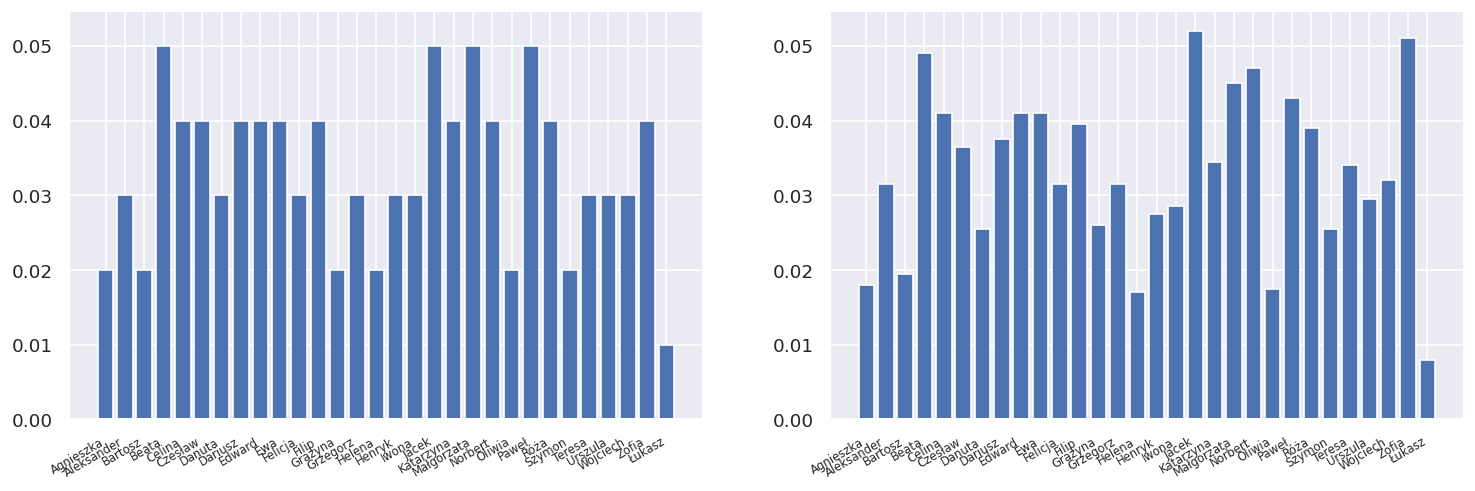

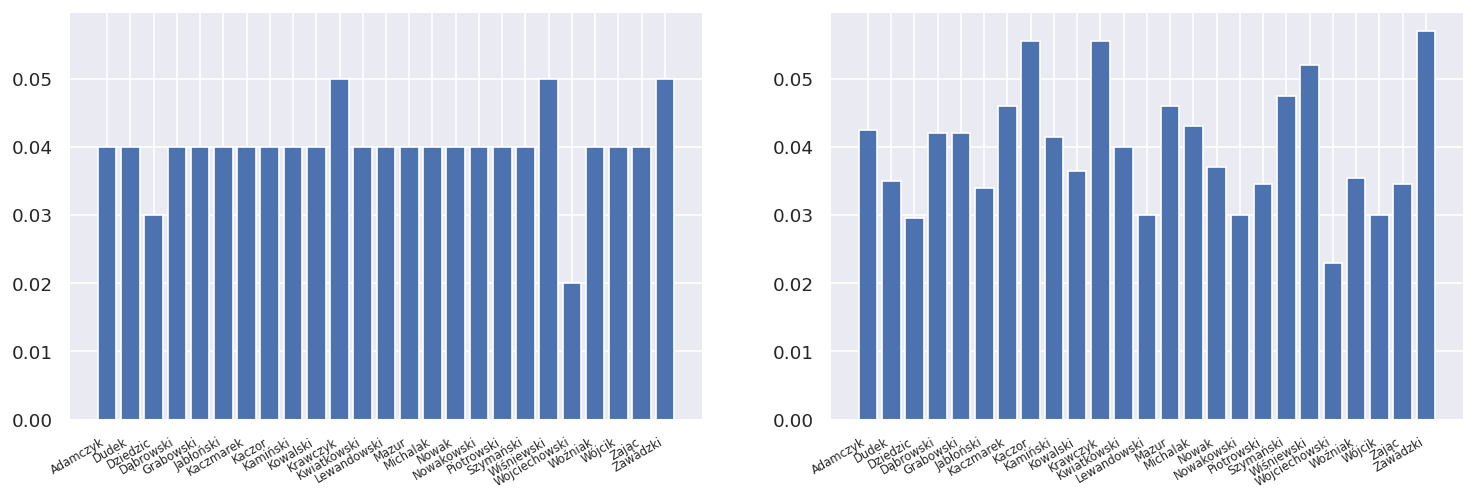

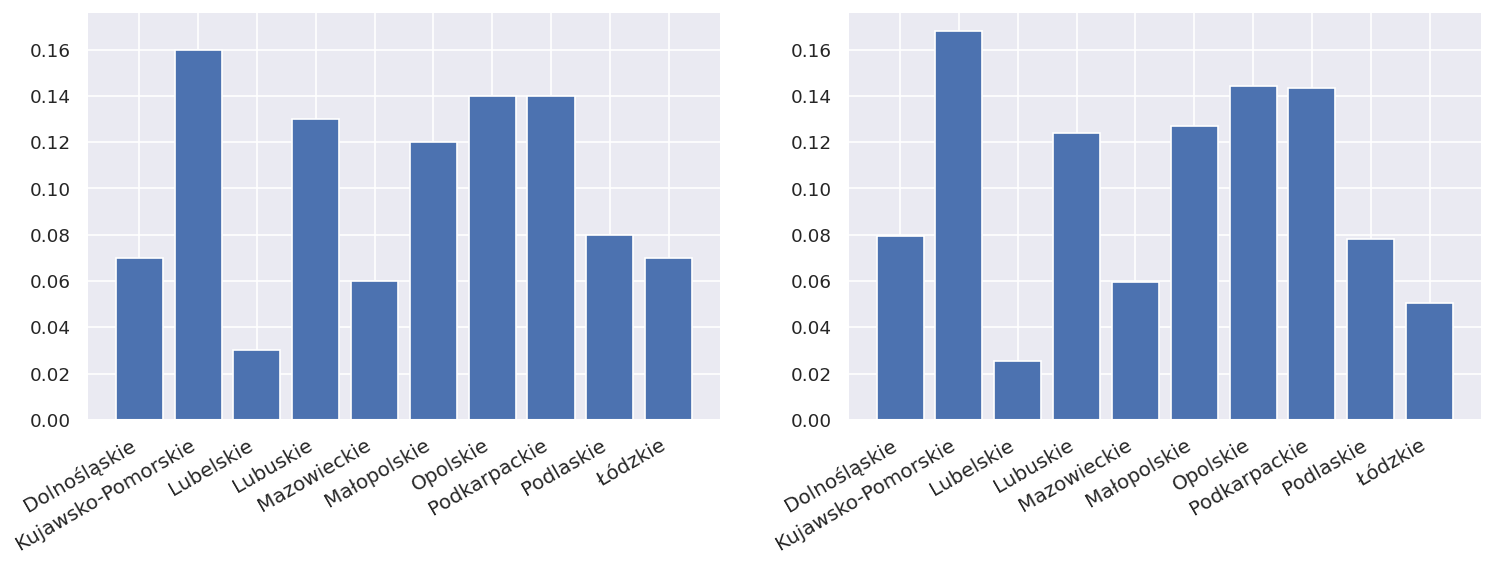

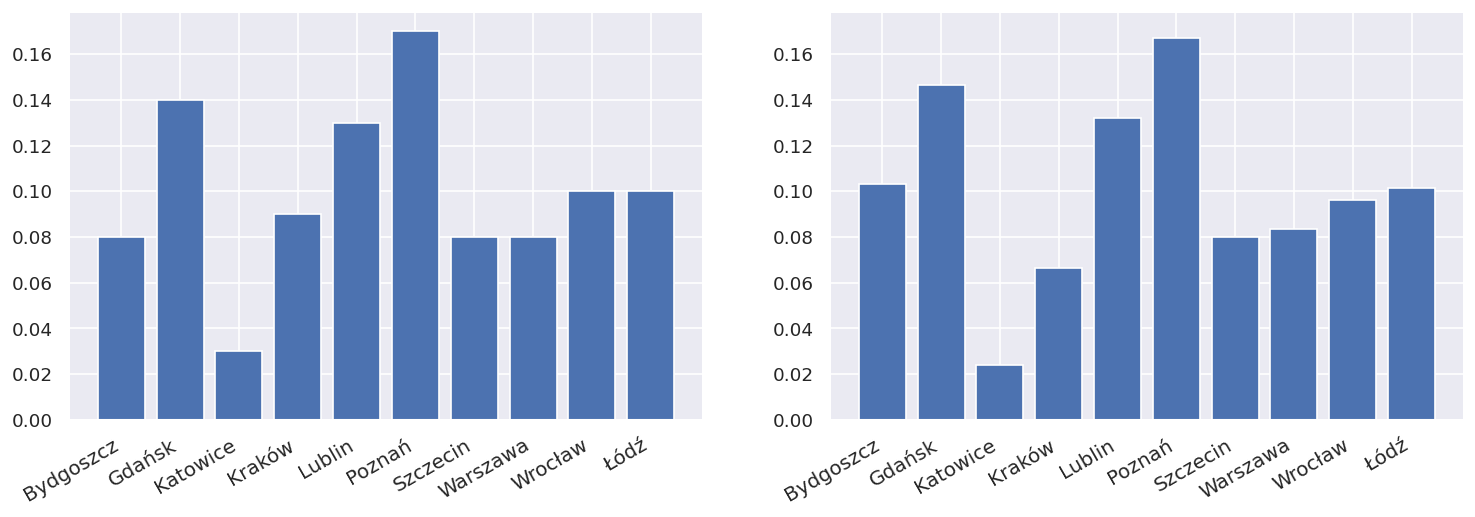

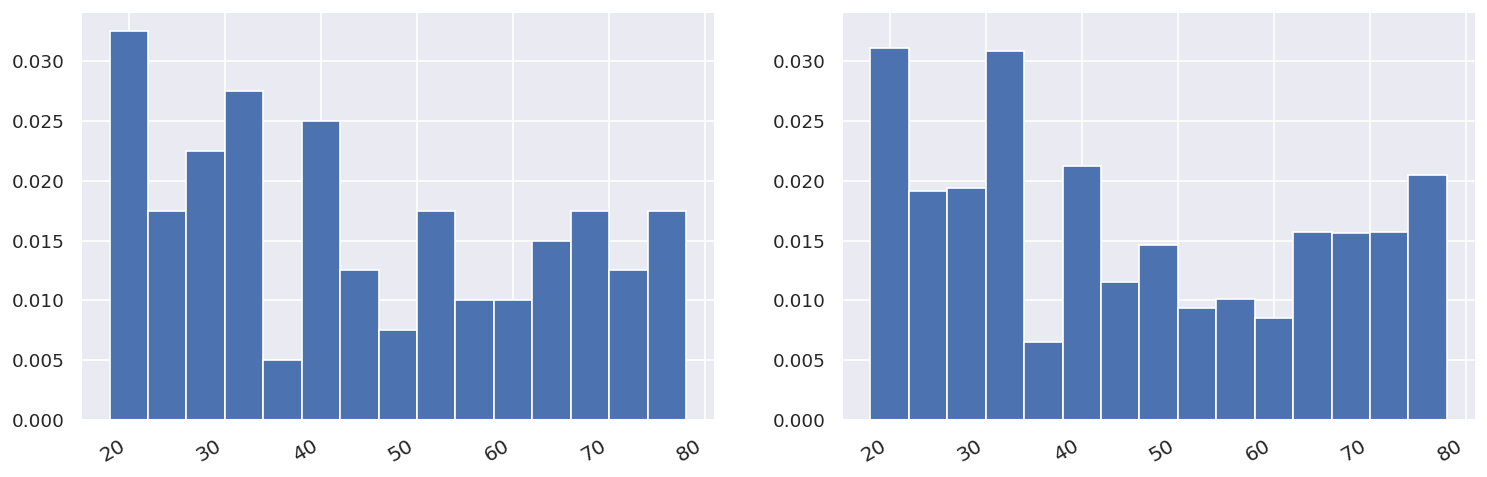

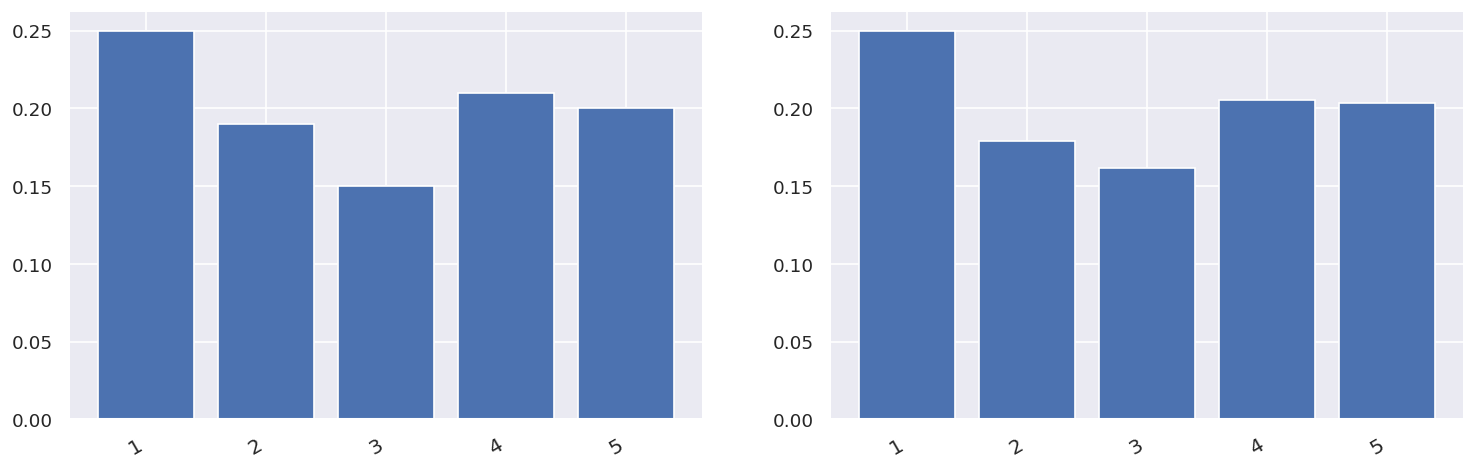

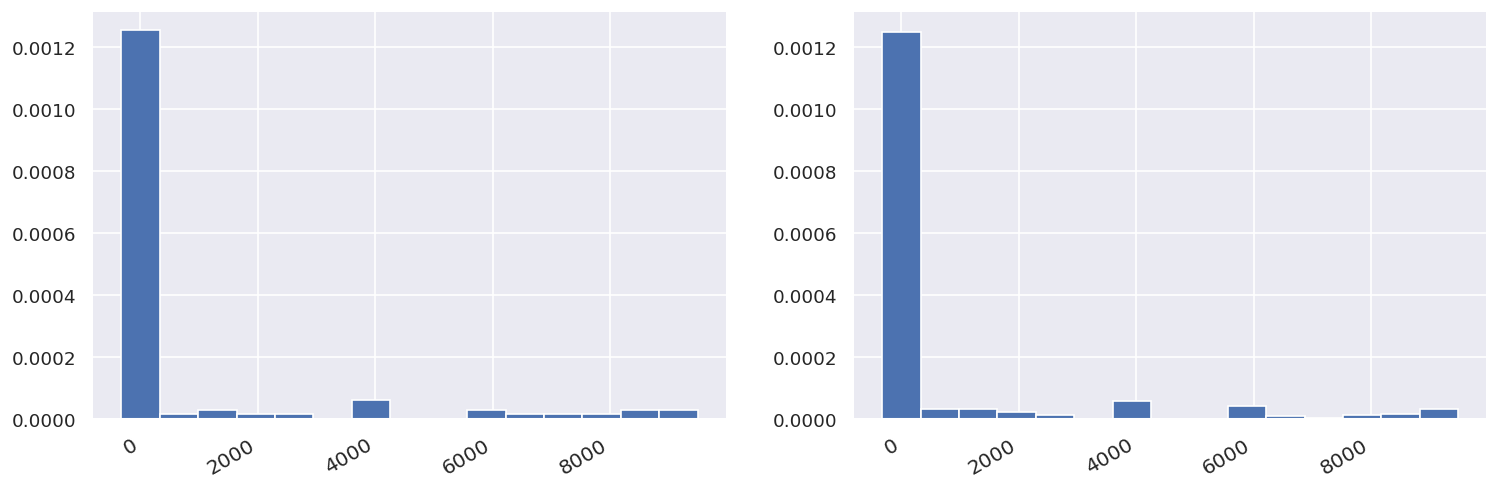

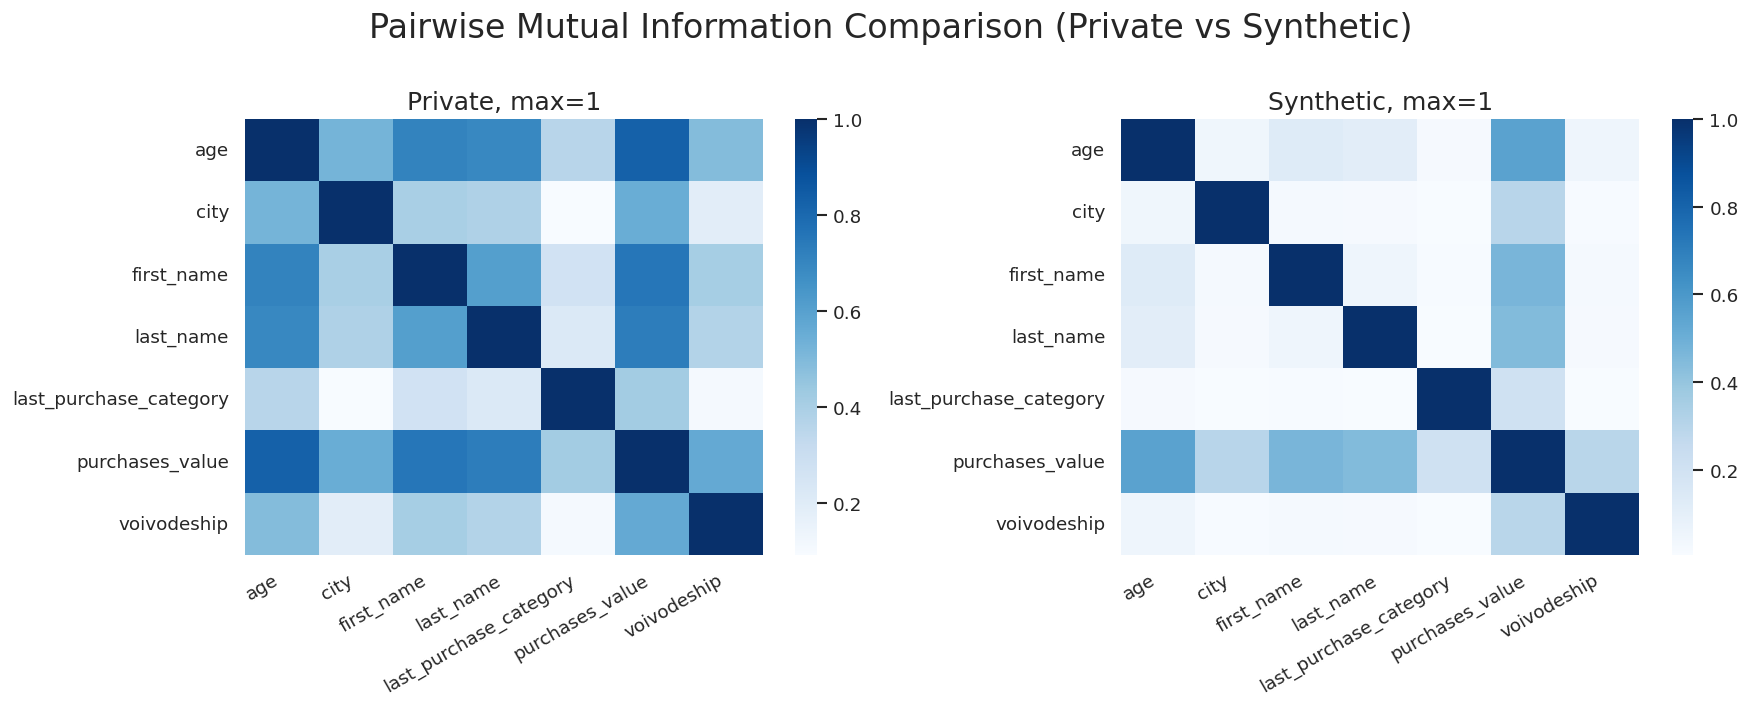

In [22]:
# Load the original and synthetic dataset and compare their statistical properties
input_data = pd.read_csv(input_data_path)
synthetic_data = pd.read_csv(synthetic_data_output_path)
attribute_description = read_json_file(data_description_output_path)['attribute_description']

inspector = ModelInspector(
    input_data,
    synthetic_data,
    attribute_description
)

# Compare histograms between input and synthetic datasets
for idx, attribute in enumerate(synthetic_data.columns):
    inspector.compare_histograms(attribute)
    # Change the font size of bin labels
    if idx < 2:
        for ax in plt.gcf().axes:
            for label in ax.get_xticklabels():
                label.set_fontsize(7)
    else:
        for ax in plt.gcf().axes:
            for label in ax.get_xticklabels():

                
                label.set_fontsize(12) 
plt.show()

# Compare pairwise mutual information
inspector.mutual_information_heatmap()
plt.show()